In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [2]:
#checking null values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [3]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


### 1. Find out how many males and females participated in the test. 

In [4]:
#finding num of males and females
a=df['gender'].value_counts()
a

female    518
male      482
Name: gender, dtype: int64

### 2. What do you think about the students' parental level of education? 

In [5]:
b=df['parental level of education'].value_counts()
b

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

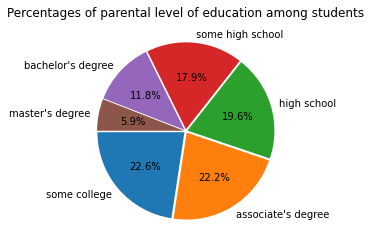

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title("Percentages of parental level of education among students")
explode=(0.02,0.02,0.02,0.02,0.02,0.02)
plt.pie(b,explode=explode,labels=b.index, autopct='%1.1f%%', startangle=180);

### 3. Who scores the most on average for math, reading and writing based on

### Gender

In [8]:
df1=df[['gender','math score','reading score','writing score']].groupby('gender').mean()
df1

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


##### Females have better reading and writing averages, while males are good in math

### Test preparation course

In [9]:
df2=df[['test preparation course','math score','reading score','writing score']].groupby('test preparation course').mean()
df2

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


##### students completed the test preparation course have better scores in every subject than those who didn't attend the course

### 4. What do you think about the scoring variation for math, reading and writing based on

### Gender

In [15]:
df3=df[['gender','math score','reading score','writing score']].groupby('gender').var()
df3

,math score,reading score,writing score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


##### females have greater variations compared to males

### Test preparation course

In [16]:
df4=df[['test preparation course','math score','reading score','writing score']].groupby('test preparation course').var()
df4

,math score,reading score,writing score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


##### students completed the course of test preparation shows less variation in compared to others

### 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [18]:
t= df.describe().loc["75%"].tolist()[0] #getting values from describe of dataframe and taking the top 25% by choosing the quartile above 75% percentile
top25=df[(df['math score'] >=t)]
top25

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
414,female,group A,high school,free/reduced,completed,77,88,85
415,female,group B,master's degree,free/reduced,completed,77,97,94
416,female,group B,bachelor's degree,free/reduced,none,77,85,87
417,female,group B,master's degree,standard,none,77,90,84
418,female,group B,high school,standard,completed,77,82,89
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93
